In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(datasets.load_iris()['data'],columns=datasets.load_iris()['feature_names']) 
X = iris.data
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1)

In [3]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
#建立模型
from sklearn.cluster import KMeans
k_model = KMeans(n_clusters=3)
#模型训练
k_model.fit(Xtrain)
#对数据集df进行聚类
pre = k_model.predict(df)
#获取聚类中心
center = k_model.cluster_centers_
#输出聚类结果和聚类中心点
print(pre,center)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1] [[5.01702128 3.42765957 1.47234043 0.24255319]
 [5.94107143 2.75535714 4.46785714 1.46428571]
 [6.846875   3.0375     5.765625   2.071875  ]]


In [5]:
#将预测的结果加入到数据集中
df['cluster_3'] = pre
#查看数据
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_3
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


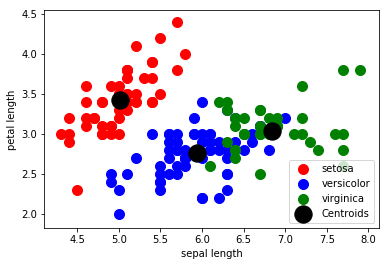

In [10]:
# 导入可视化工具包
import matplotlib.pyplot as plt
%matplotlib inline

# 颜色和标签列表
colors_list = ['red', 'blue', 'green']
labels_list = ['setosa', 'versicolor', 'virginica']

# 需要将DataFrame转成ndarray,才能进行 df[pre==i,0]
df = df

for i in range(3):
    plt.scatter(df[pre==i,0], df[pre== i,1], s=100,c=colors_list[i],label = labels_list[i])

# 聚类中心点
plt.scatter(center[:,0],center[:,1], s=300,c='black',label='Centroids')

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.savefig('F:\\Apython\\works-wpp\\数据挖掘基础\\k-means.png')
plt.show()